<a href="https://colab.research.google.com/github/isabellapompeu/datascience_portfolio/blob/master/Analisando_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Analisando os Dados do Airbnb**

---
Quem nunca viajou e ficou hospedado na casa de alguém conhecido ou parente não é mesmo? Ou então ofereceu a sua própria casa para que algum amigo passasse um período de tempo?

Bom, foi assim que o [Airbnb](https://www.airbnb.com.br/) começou em 2008, quando dois designers hospedaram alguns viajantes que procuravam um lugar para ficar!

Atualmente, o site conta com mais de 500 mil anúncios em cerca de 35.000 cidades e 192 países diferentes, onde diversas pessoas divulgam seus imóveis para o tão famigerado aluguel de temporada. Uma iniciativa que parecia tão simples no início desafia, atualmente, várias das maiores redes hoteleiras tradicionais.

Apartamentos inteiros, casas ou quartos? Se hospedar com os donos na da casa ou dividir um local vazio com os amigos e família? O site oferece opções para todos os gostos!

<center><img alt="Analisando Airbnb" width="15%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

Além disso, a empresa se propõe a disponiblizar dados de algumas das principais cidades do mundo por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), onde é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

**Neste *notebook*, iremos analisar os dados referentes à Hong Kong e ver quais insights podem ser extraídos a partir de dados brutos.**


---
# **Hong Kong**
---

Essa região administrativa da China foi a cidade mais visitada do mundo em 2019, recebendo mais de 3x sua população (8 milhões de habitantes) em número de turistas dentro de seus comedidos 1 104 km² de extensão. Ela foi também a cidade mais visitada em 2018, mas um fato muito interessante é que *ela não foi citada* no [Top 10 de 2017, de acordo com a Veja](https://bit.ly/3gPMLP1).

Alguns dos pontos turísticos mais conhecidos são a vista do edifício Victoria Peak, o distrito de Mong Kok e a estátua do Buda Gigante. Brasileiros não precisam de visto para uma estadia de até 90 dias no país.

<center><img alt="Analisando Airbnb" width="50%" src="https://bit.ly/2BrCBUx">

[*Foto EarnestTse via Shutterstock*](https://www.shutterstock.com/pt/g/earnest%20tse)</center>




## Obtenção de Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Hong Kong (good for visualisations).*


In [0]:
# importar pacote de dados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# Obs. '%matplotlib inline' para que o código não retorne um valor

In [0]:
# importar o arquivo listings.csv  para o DataFrame
df = pd.read_csv('http://data.insideairbnb.com/china/hk/hong-kong/2020-04-29/visualisations/listings.csv')

## Análise de Dados

A análise de dados tem por objetivo compreender como os dados estão estruturados e organizá-los de uma forma que permita o desenvolvimento de insights sobre o tema.

**Dicionário de Variáveis**

* `id` - número de identificação do imóvel
* `name` - nome do imóvel 
* `host_id` - número de identificação do proprietário
* `hosta_name` - nome do proprietário
* `neighbourhood_group` - esta coluna não contem valores válidos
* `neighbourhood` - nome do bairro
* `latitude` - latitude
* `longitude` - longitude
* `room_type` - tipo do imóvel
* `price` - preço do imóvel
* `minimum_nights` - número mínimo de noites para hospedagem
* `number_of_reviews` - número de reviews que o imóvel possui
* `last_review` - data da última vizualização
* `reviews_per_month` - número de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis de um mesmo proprietário
* `availability_365` - número de dias disponíveis do imóvel por ano 

Antes de iniciar a análise de fato, verificamos os primeiros valor do nosso *dataset*, para podermos ter uma ideia de sua de seu estado.

In [7]:
# visualizar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,69074,Beautiful oasis of plants & art @ best location,160139,Amy,NaN,Central & Western,22.28352,114.15018,Entire home/apt,1395,3,134,2020-03-24,1.20,1,138
1,75083,SoHo off Hollywood Road 3B,304876,Brend,NaN,Central & Western,22.28398,114.14839,Entire home/apt,783,14,228,2017-08-14,2.04,13,335
2,103760,Central Centre 5 min walk to/from Central MTR,304876,Brend,NaN,Central & Western,22.28407,114.15570,Entire home/apt,845,2,270,2020-04-08,2.50,13,360
3,132773,Fabulous 2 Bdrm Aprt Open kitchen,304876,Brend,NaN,Central & Western,22.28868,114.14494,Entire home/apt,1046,2,304,2020-04-05,2.84,13,348
4,133390,"Soho, Hong Kong 1 bedroom flat",654642,Robin,NaN,Central & Western,22.28343,114.15539,Entire home/apt,930,2,27,2015-06-30,0.25,1,87


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Este *dataset* é a versão "resumida" do Airbnb. Há uma versão mais completa com 106 variáveis (`listings.csv.gz`).

In [22]:
# identificar as dimensões do Data Frame
print(f'Entradas:\t {df.shape[0]}')
print(f'Variáveis:\t {df.shape[1]}\n')

#verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 11535
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

É possível notar que não será necessário alterar os tipos das variáveis para prosseguir com a análise de dados.

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [33]:
# ordenar as variáveis em ordem decrescente por porcentagem de seus valores ausentes
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

neighbourhood_group               100.000000
reviews_per_month                  37.433897
last_review                        37.433897
name                                0.069354
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_name                           0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

O número de valores nulos influencia diretamente na *qualidade* do *dataset*, uma vez que eles são significativos comparados ao total de entradas e podem poluir a análise.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase 40% das linhas.
* A variável `name` tem cerca de 0.07% dos valores nulos.

### **Q3. Qual o tipo de distribuição das variáveis?** 

A distribuição das variáveis numéricas contínuas pode ser facilmente identificada com o plot de um histograma.

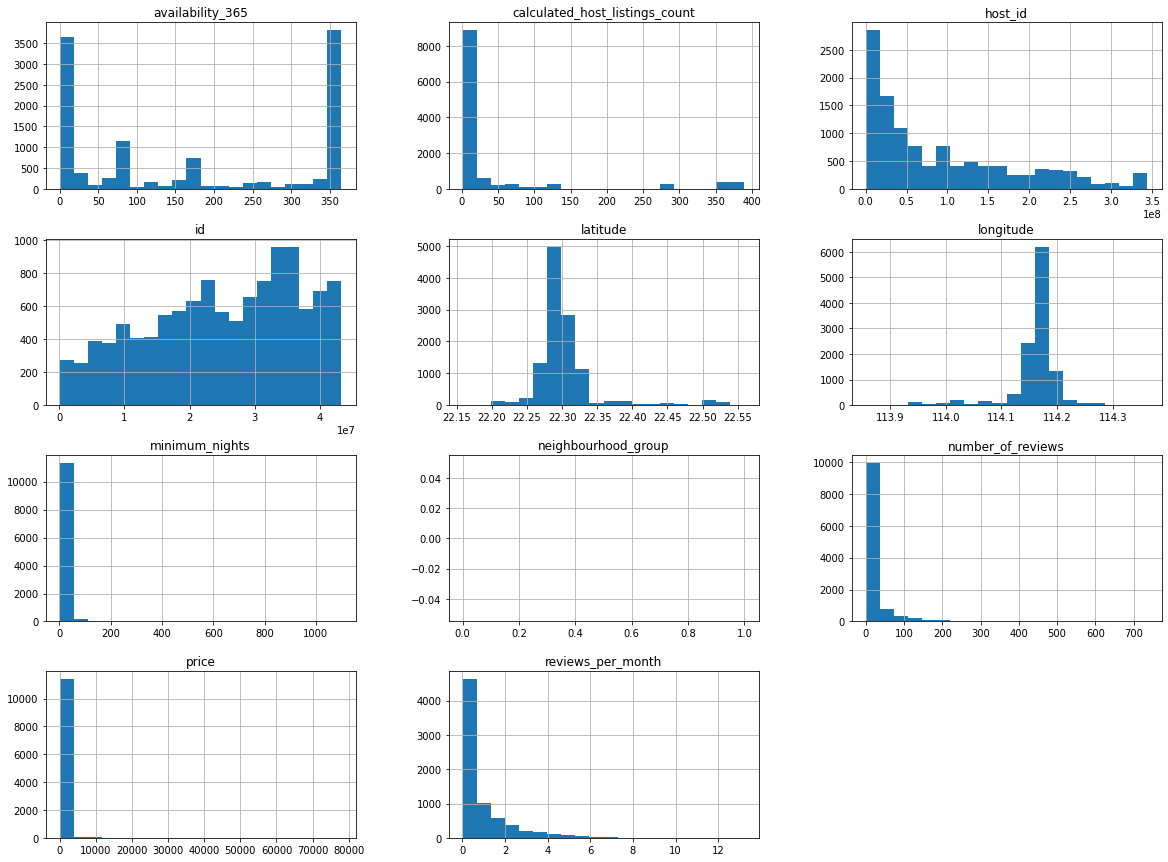

In [35]:
# plotar histograma de variáveis numéricas
df.hist(bins=20, figsize=(20,15));

### **Q4. Há *outliers* presentes?**

*Outliers* são valores que distorcem a representação gráfica dos dados e dificultam sua interpretação. **São valores que estão muito além ou aquém dos valores médios dos dados**.

O histograma permite notar indícios da presença de *outliers*. Por exemplo, nas variáveis `price`, `minimum_nights`, `calculated_host_listings_count`, `number_of_reviews` e `reviews_per_month`.

Apesar de histogramas nos darem ideia da distribuição dos dados, há duas formas rápidas (e muito simples) de *confirmar* se há, ou não, a presença de *outliers* dentro do Data Frame. 
* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [37]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,11535.000000,11535.000000,11535.000000,7217.000000,11535.000000,11535.000000
mean,769.382315,9.456003,17.735154,0.899724,44.745644,172.731253
std,2407.634235,27.858655,41.086132,1.246448,102.228143,156.453435
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,295.000000,1.000000,0.000000,0.130000,1.000000,0.000000
50%,465.000000,2.000000,2.000000,0.370000,4.000000,141.000000
75%,798.000000,7.000000,14.000000,1.130000,18.000000,364.000000
max,78001.000000,1100.000000,736.000000,13.230000,390.000000,365.000000


A partir do resumo estatístico, algumas hipóteses são confirmadas, como:

* A variável `price` possui 75% do valor abaixo de 798, porém seu valor máximo é 78001.
* A variável `number_of_reviews` possui 75% do valor abaixo de 14, porém seu valor máximo é 736.
* A variável `reviews_per_month` possui 75% do valor abaixo de 1.13, porém seu valor máximo é 13.23.
* A variável `calculated_host_listings_count` possui 75% do valor abaixo de 18, porém seu valor máximo é 390.
* Para algumas entradas, a quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.


#### Boxplot para price

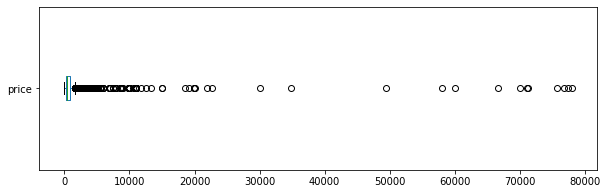

price: valores acima de 1500
790 entradas
6.8487%


In [67]:
## plotar boxplots para a variável
# price
df.price.plot(kind='box', vert=False, figsize=(10, 3))
plt.show()

# ver quantidade de valores acima de $1500 para price
print('price: valores acima de 1500')
print(f'{len(df[df.price > 1500])} entradas')
print('{:.4f}%'.format((len(df[df.price > 1500]) / df.shape[0]) * 100))

#### Boxplot para calculated_host_listings_count

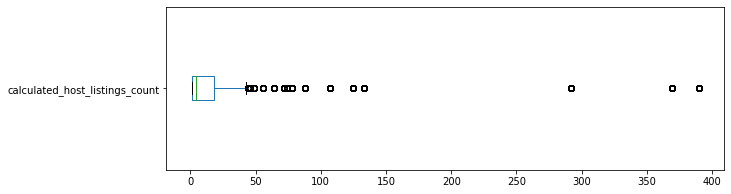

calculated_host_listings_count: valores acima de 70:
1728 entradas
14.9805%


In [102]:
## plotar boxplots para a variável
#calculated_host_listings_count
df.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(10, 3))
plt.show()

# ver quantidade de valores acima de 70 imóveis para calculated_host_listings_count
print('calculated_host_listings_count: valores acima de 70:')
print(f'{len(df[df.calculated_host_listings_count > 70])} entradas')
print('{:.4f}%'.format((len(df[df.calculated_host_listings_count > 70]) / df.shape[0]) * 100))

#### Boxplot para minimum_nights

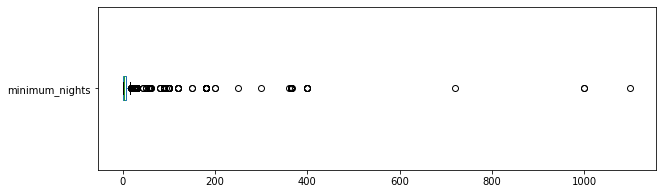

minimum_nights: valores acima de 30:
284 entradas
2.4621%


In [68]:
## plotar boxplots para a variável
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(10, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print('minimum_nights: valores acima de 30:')
print(f'{len(df[df.minimum_nights > 30])} entradas')
print('{:.4f}%'.format((len(df[df.minimum_nights > 30]) / df.shape[0]) * 100))

#### Histogramas sem *outliers*

Após identificar os outliers nas principais variáveis em questão, podemos limpar o *DataFrame* e refazer os histogramas.

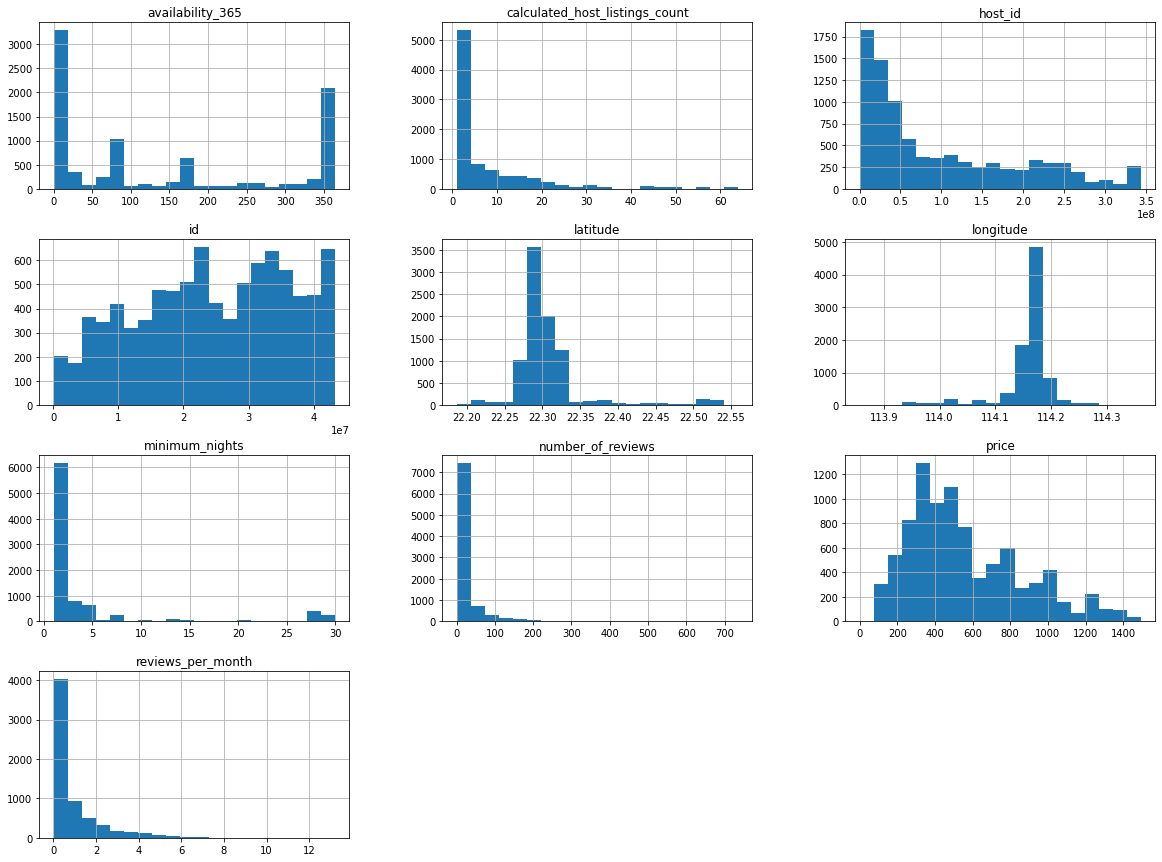

In [70]:
# remover outliers em um novo Data Frame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 70].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover neighbourhood_group pois ele está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=20, figsize=(20, 15)) ; 



### **Q5. Qual a correlação existente entre as variáveis**

A correlação indica uma relação de correspondência entre duas variáveis. Ela varia entre -1 e 1, indicando um relação diretamente ou inversamente proporcional, respectivamente. Quanto mais próximo de 1 ou -1, mais forte é essa relação.

Quem mede essa ligação é o coeficiente de correlação, para calculado nós iremos fazer:

* Criação de uma matriz de correlação
* Geração de um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`



In [71]:
# criação de uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.030757,0.024542,-0.003844,-0.189981,-0.110743
minimum_nights,-0.030757,1.000000,-0.081665,-0.092898,0.121048,0.133090
number_of_reviews,0.024542,-0.081665,1.000000,0.819467,0.077112,0.095216
reviews_per_month,-0.003844,-0.092898,0.819467,1.000000,0.026729,0.073624
calculated_host_listings_count,-0.189981,0.121048,0.077112,0.026729,1.000000,0.360551
availability_365,-0.110743,0.133090,0.095216,0.073624,0.360551,1.000000


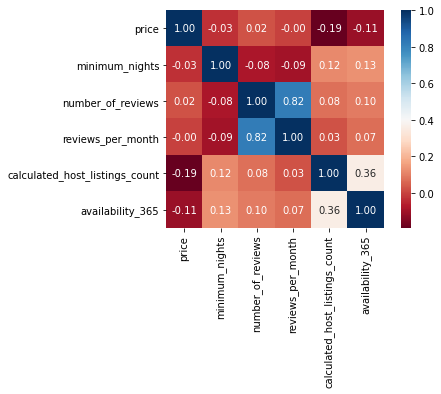

In [77]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True) ;

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

O site da Airbnb oferece diversos tipos de imóveis, desde quartos até casas inteiras, sendo elas ocupadas ou não.

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Sendo assim, vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [79]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df_clean.room_type.value_counts() / df.shape[0]) * 100


Entire home/apt    35.743390
Private room       35.570004
Shared room         4.031209
Hotel room          1.915908
Name: room_type, dtype: float64

Dessa forma, é possível notar:

* Que tanto os apartamentos/casas inteiras, quato os quartos privados possuem o mesmo número de anúncios

* Que os quartos de hoteis são os imóveis menos divulgados no site para estadias em Hong Kong.

### **Q7. Qual a localidade mais cara de Hong Kong?**

Para responder essa pergunta, precisamos comparar as médias dos preços de imóveis por bairro. Umas das formas de se verificar uma variável em função da outra é usando `groupby()`:

In [83]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
Central & Western    688.837394
Kwai Tsing           688.194444
Islands              657.071078
Southern             622.043478
Tsuen Wan            608.200000
Wan Chai             600.984398
Wong Tai Sin         563.826087
Eastern              560.946488
Sai Kung             555.007194
Kowloon City         547.432343
Tuen Mun             486.509434
Yau Tsim Mong        481.521814
Tai Po               478.740000
Kwun Tong            474.901639
Sha Tin              458.741379
Yuen Long            439.527363
Sham Shui Po         421.434783
North                388.429487
Name: price, dtype: float64

Acima, vemos que bairros como Central & Western, Kwai Tsing e Islands, estão com média de preço superior a outros bairros de Hong Kong.

No entanto, existem casos em que a amostra pode ser não-representativa, ao apresentar um desbalanceamento muito grande no tamanho das amostras, por exemplo. Por isso, também iremos conferir a quantidade de imóveis em cada bairro.

In [94]:
df_clean.neighbourhood.value_counts().sort_values(ascending=False)

Yau Tsim Mong        3507
Central & Western    1888
Wan Chai             1346
Islands               408
Kowloon City          303
Eastern               299
Sham Shui Po          207
Yuen Long             201
North                 156
Sai Kung              139
Sha Tin               116
Southern               69
Kwun Tong              61
Tuen Mun               53
Tsuen Wan              50
Tai Po                 50
Kwai Tsing             36
Wong Tai Sin           23
Name: neighbourhood, dtype: int64

Nesse caso, é possível notar que tanto entre os bairros com taxas mais caras quanto para os bairros com taxas mais baratas, o número de imóveis em cada vizinhança vária de forma imprevisível e não permite nenhuma conclusão em relação ao volume de dados.

#### Mapeamento dos imóveis em Hong Kong

A base de dados resumida fornece a latitude e longitude de cada um dos imóveis anunciados no site. Graças a isso, é possível plotar cada ponto, considerando-se `x=longitude` e `y=latitude`.

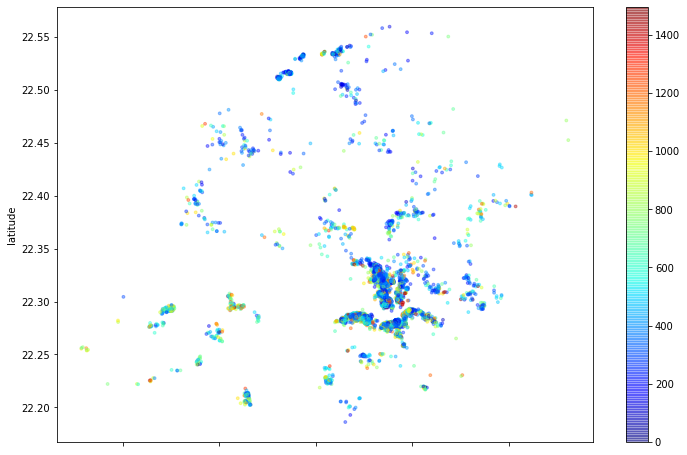

In [99]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, 
              cmap=plt.get_cmap('jet'), figsize=(12, 8));

---
# **Conclusões**
---

A base de dados usada foi uma versão resumida do arquivo original. Dessa forma, a análise feita também foi superficial, mas mesmo assim, já foi possível perceber alguns pontos importantes sobre o conjunto de dados.

Existem *outliers* indesejados em várias das variáveis analizadas. Também se notou que, apesar de haver uma disparidade muito grande entre as regiões com mais e menos imóveis, todas as regiões possuem várias opções para escolha.

Outra característica interessante a se observar é o aparente monóplio de imóveis, uma vez que 45% dos proprietários possui mais de 5 quartos/edifícios anunciados para aluguel de temporada.

Por fim, lembre-se que este *dataset* é ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.